# Grafy
Pro vizuazalizace tabulek a ve formě grafů, můžeme použit vestavěný modul pandasu `plot()`.
Ten je vhodný na jednoduché a vykreslení základních grafů.
Další možností a mnohem komplexnější možností je požít knihovnu [Matplotlib](https://matplotlib.org/).
Tuto knihovnu používá i Pandas a proto je možné (a někdy i nutné) kombinovat.

### Použití v Jupyteru
Pokut nepotřebojete nic "speciálního", stačí knihovna Pansas:

In [1]:
import pandas as pd

Pokud potřebujete i knihovnu Matplotlib, tak provedeme i následující import.
Ten ještě doplníme o přepínač, který řekne jupyteru, aby grafy rovnou zobrazoval.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data
Než začneme testovat, vygenerujeme si sadu testovacích dat.
Budeme používat dně sady.
#### Udaje Horách ve Skocku

In [3]:
sh = pd.read_csv("static/scottish_hills.csv", index_col=0)
sh.head()

Height   Latitude  Longitude    Osgrid
Hill Name                                                         
A' Bhuidheanach Bheag        936.0  56.870342  -4.199001  NN660775
A' Chailleach                997.0  57.693800  -5.128715  NH136714
A' Chailleach                929.2  57.109564  -4.179285  NH681041
A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
A' Ghlas-bheinn              918.0  57.255090  -5.303687  NH008231

#### Náhodnou sadu čícel:

In [4]:
import numpy as np

df = pd.DataFrame(
    np.random.rand(10,4),
    index=pd.date_range('1/1/2000', periods=10), 
    columns=list('ABCD'))

df.head()

A         B         C         D
2000-01-01  0.982538  0.595983  0.004020  0.387375
2000-01-02  0.660422  0.355118  0.435534  0.893018
2000-01-03  0.276948  0.705906  0.778680  0.242137
2000-01-04  0.895170  0.686194  0.311465  0.007500
2000-01-05  0.912326  0.861679  0.913122  0.625143

## Přehled základních grafů:
V následující části si ukážeme několik základních grafů:

### Základní lineární graf
Jednoduchý graf dokáže pandas vytvořit z každé číselné serie:

In [5]:
sh["Height"].plot()

<AxesSubplot:xlabel='Hill Name'>

Pokud DataFrame obsahuje více číselných dat, je možné je vykreslit všechny současně.
Toto je ale použitelné pouze pokud mají stejnou doménu.

In [6]:
sh.plot()

<AxesSubplot:xlabel='Hill Name'>

V případě Druhé sady dat, je ale toto zobrazení již smysluplné:

<AxesSubplot:>

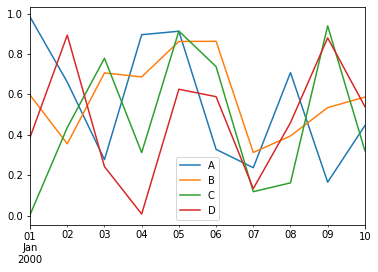

In [8]:
df.plot()

### Sloupcová graf
Další možností zobrazit data do spoupcového grafu.
Nejprve se podíváme na zobrazení jednoduché série:

<AxesSubplot:>

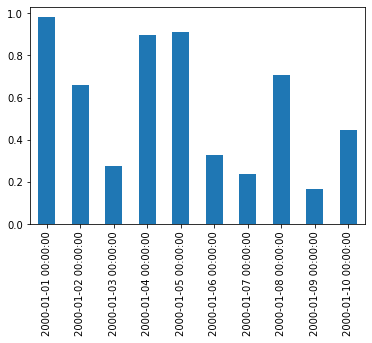

In [9]:
df["A"].plot.bar()

Pro celý dataframe vypadá graf následovně:

<AxesSubplot:>

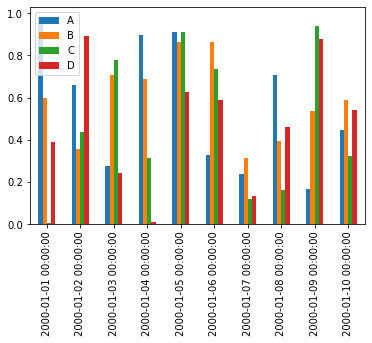

In [10]:
df.plot.bar()

Graf ale můžeme snadno modifikovat a zorazit všechny data do jednoho sloupce:

<AxesSubplot:>

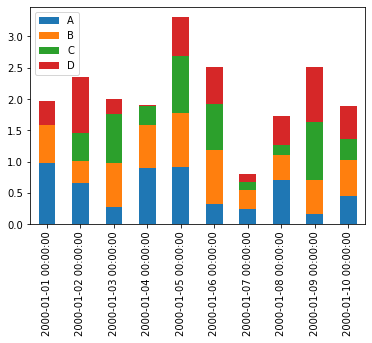

In [11]:
df.plot.bar(stacked=True)

Sloupce grafy se často používají s funkci `groupby()`.
Pojdmě si nyní rozděli kopce ve skocku do kategorii (po 100 metrech) a zobrazit si kolik cloupců v každé kategorii je.

Nejprve si nadefinujeme kategorie:

In [ ]:
sh["Category"] = (sh["Height"] // 100) * 100
sh.head()

Poté je zobrazíme pomocí `groupby` a `plot.bar()`:

In [ ]:
sh.groupby("Category").count()["Height"].plot.bar()

### Horizonální Bar
Pro horizonrální bar platí to stejné jako pro horizontální:

<AxesSubplot:>

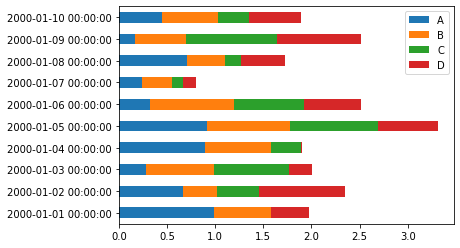

In [12]:
df.plot.barh(stacked=True)

### Histogramy
Pokud potřebujeme zobrazit jednoduchý histogram výšek, jako v předchozím případě.
Pandas má pro tento typ grafů vestavěnou funkci:

<AxesSubplot:ylabel='Frequency'>

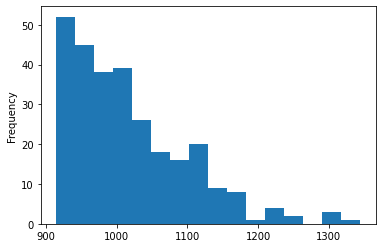

In [14]:
sh["Height"].plot.hist(bins=16)

Hisotgram lze rovněž zobrazit pro celý Dataframe, zde si ale raději vygenerujme tabulku s náhodným rozložením:

<AxesSubplot:ylabel='Frequency'>

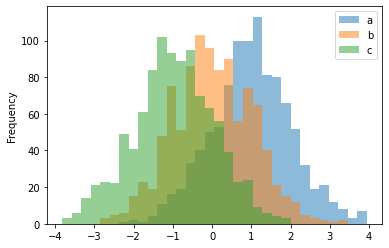

In [16]:
df=pd.DataFrame(
    {'a':np.random.randn(1000)+1,
     'b':np.random.randn(1000),
     'c':np.random.randn(1000) - 1}, 
    columns=['a', 'b', 'c'])

df.plot.hist(bins=32, alpha=0.5)

### Density plot
Podobný diagram:

In [18]:
%pip install scipy

     ---------------------------------------- 36.9/36.9 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:ylabel='Density'>

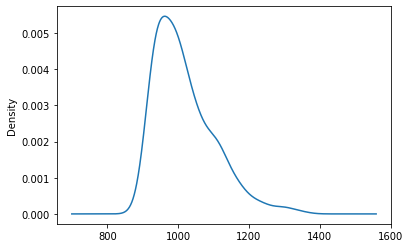

In [19]:
sh["Height"].plot.kde()

### Box plot
Ze statistického hlediska je hodně vypovídající takzvaný *Boxplot*.
Tento graf zobrazuje základní udaje o jedné serii do schmeatického boxu, viz obrázek:
![](media/box-plot-explained.gif)

Ten sice lze vytvořit i pro jednu serii, ale má větší smysl jej použít nad několika sloupci z DataFrame.

<AxesSubplot:>

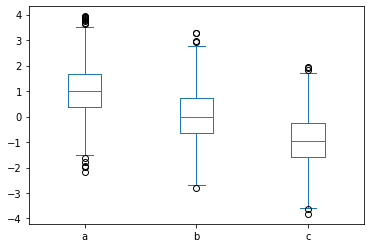

In [20]:
df.plot.box()

### Area plot
Area plot je obdobou klasického **plot**, ale vyplněnou barvou pod linkou.

<AxesSubplot:xlabel='Hill Name'>

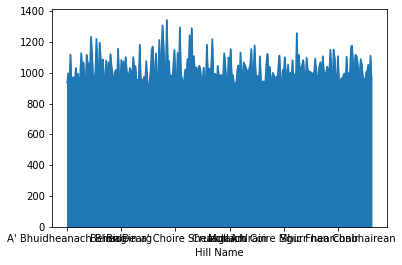

In [21]:
sh["Height"].plot.area()

V případě celeho Dataframe:

<AxesSubplot:>

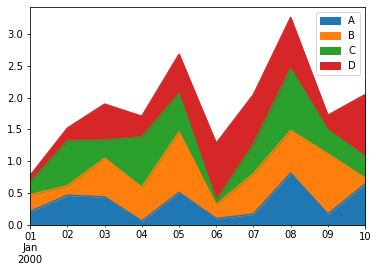

In [22]:
df = pd.DataFrame(
    np.random.rand(10,4),
    index=pd.date_range('1/1/2000', periods=10), 
    columns=list('ABCD'))
df.plot.area()

### Scater plot
Použijeme, pokud chceme vykreslit závislosti mezi dvěma veličinami.
Napříkla pozici *Latitude* a *Longitude* v našem "horském" dataframe:

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

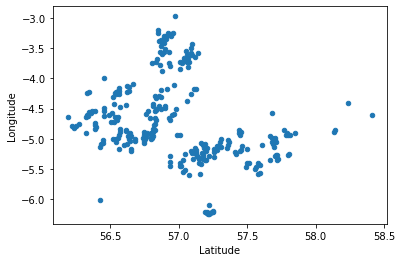

In [23]:
sh.plot.scatter(x = "Latitude", y="Longitude")

Tento diagram lze velmi pěkne vylepšit, například lze změnit značku pomocí parametru `marker="^`, což nám vykreslí místo teček "kopečky".

Druhým, tentokát univerzálním paramterem je `figsize=(w,h)`, který upraví velikost výsledného grafu:

In [24]:
sh.plot.scatter(x = "Latitude", 
                y="Longitude", 
                alpha=0.5, 
                marker="^",
                figsize=(10,10))

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

Další možnosti je upravit baru u kadého bodu:

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

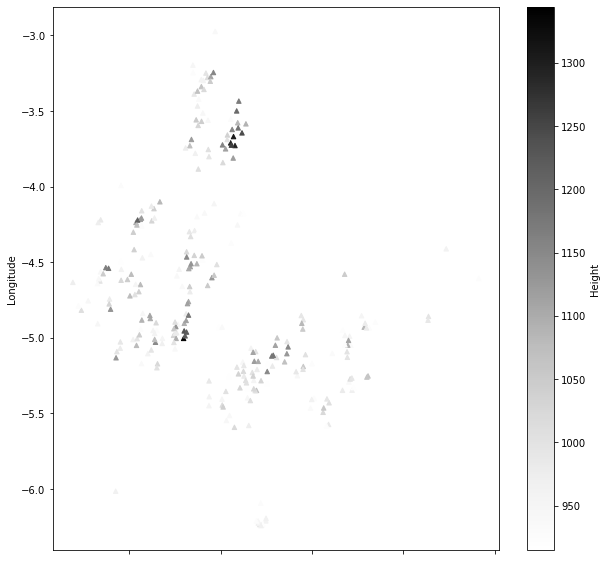

In [25]:
sh.plot.scatter(x = "Latitude", 
                y="Longitude", 
                c="Height", 
                marker="^",
                figsize=(10,10))

Nebo lze upravit velikost:

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

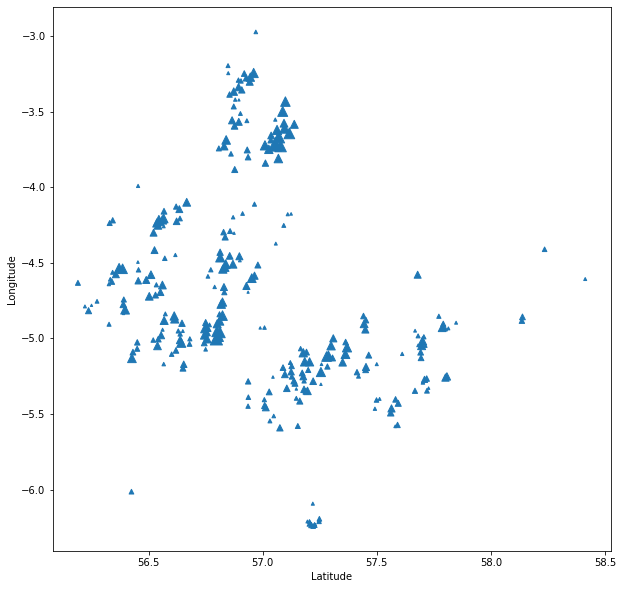

In [26]:
sh.plot.scatter(x = "Latitude", 
                y="Longitude", 
                s=(sh["Height"]-900)/3, 
                marker="^",
                figsize=(10,10))

### Hexbin plot
Trochu podobný graf je hexbin. 
Jedná se agregační variantu scattru, ketý ve výchozí podobě zobrazuje počet výskytů na určitých souřadnicích.

In [28]:
sh.plot.hexbin(x = "Latitude", y="Longitude", gridsize=16)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

### Pie plot
Posledním grafem v tomo výčtu je klasický koláčový graf:

In [29]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)

array([<AxesSubplot:ylabel='x'>], dtype=object)

### Scatter matrix
Pro získání představy o datech v tabulce, v tomto případě rbude asi nelepší ukázak:

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(sh, figsize=(10, 10))

array([[<AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Latitude', ylabel='Height'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Height'>],
       [<AxesSubplot:xlabel='Height', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Latitude', ylabel='Latitude'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Latitude'>],
       [<AxesSubplot:xlabel='Height', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Latitude', ylabel='Longitude'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Longitude'>]],
      dtype=object)

### Zobrazení více sloupců
POkud potřebujem zobrazi náhled na celém DataFrame, zobrazí se všechny čislené hodnoty do jedné osy.
Pomocí Matplolib lze sice zobrazit na každé straně grafu jinou osu, ale to je použitelné pouze pro dvě velikosti.

<AxesSubplot:xlabel='Hill Name'>

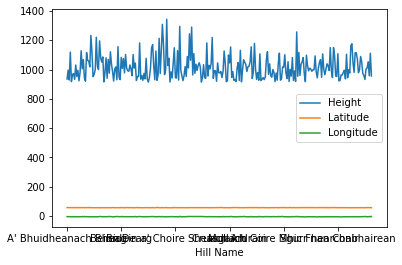

In [31]:
sh.plot()

Univerzálním řešením může být použití parametru `subplots=True`.

array([<AxesSubplot:xlabel='Hill Name'>, <AxesSubplot:xlabel='Hill Name'>,
       <AxesSubplot:xlabel='Hill Name'>], dtype=object)

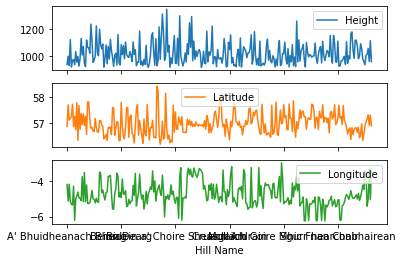

In [32]:
sh.plot(subplots=True)

----
Další informace: [Dokumentace](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)